In [1]:
import os, cv2,logging,sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import seaborn as sns
from scipy.stats import skew, kurtosis
logging.disable(logging.WARNING)

## Approach:
**Dataset used**: Advertising dataset, less features, easy to explain to beginners

* Validating the assumptions of Linear Regression 
    - Linearity.
    - Multivariate Normality
    - Mean of residuals should be zero.
    - Homoscedasticity.
    - Residual terms are normally distributed. 
    - No autocorrelation of residuals.
    - Absence of multicollinearity.

* Visualize of each feature is affecting the output variable using Simple linear regression
* Using all the features as input to the model and get better understanding of how each feature is affecting the output variable

Reference: Introduction to Statistics in R book

In [2]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.describe()

## Pairwise Plot:
* It gives a clear visualization about linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label). This also assumes that the predictors are additive.

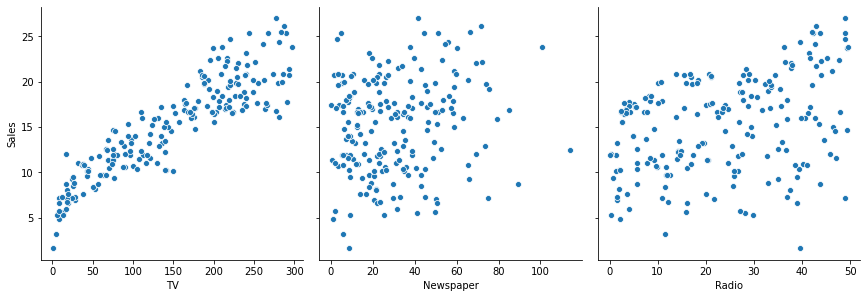

In [7]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',
             height=4, aspect=1, kind='scatter')
plt.show()

## Analysis
* TV has a good linear relationship and expected it to have a good correlation, the other features follows non-linear linearity. Linear regression will not be the perfect fit for this dataset.
* Dataset doesn't have any null or missing values, so needn't use any data imputations techniques 


## Simple Linear Regression Model for Sales using TV advertisements
As the sales shows linearity with the TV, we will build the simple linear regression to create the baseline

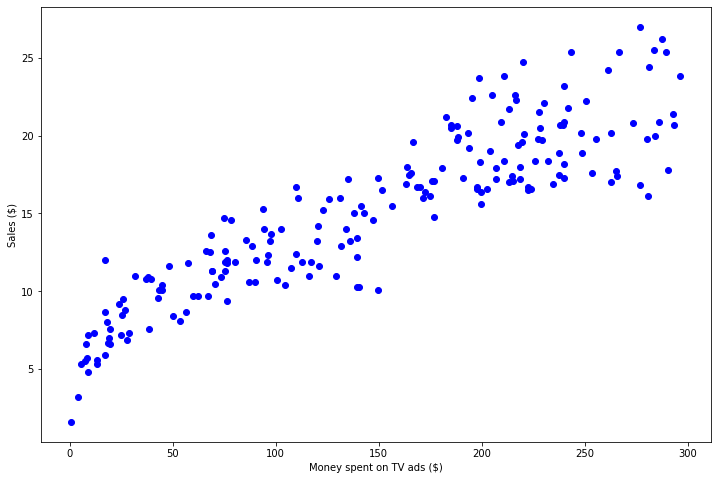

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='blue'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

### Fitting the simple linear regression line

In [62]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
pred = reg.predict(X)
print("mean_squared_error:", reg.score(y,pred))
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

mean_squared_error: -2.2654448204710067
The linear model is: Y = 6.9748 + 0.055465X


## Analysis 
* If we don't spend anything on the advertisement then the number of units that will be sold are b0 i.e. 6,974 units.
* If we spend 1000$ on TV advertisements then sales will increase by 55 units (b1 coeficient)

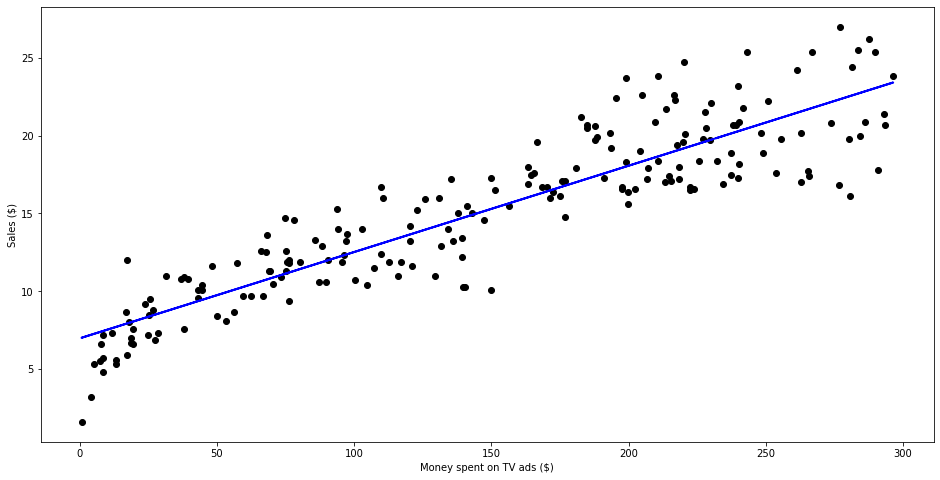

In [36]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

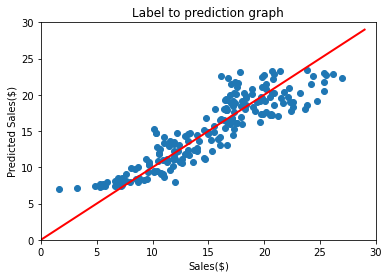

In [23]:
fig, ax = plt.subplots()
line = np.linspace(0,29,30)
ax.scatter(data['Sales'],predictions)
ax.set_title('ground truth to prediction graph')
ax.set_ylim(0,30)
ax.set_xlim(0,30)
ax.plot(
    line,
    line,
    c='red',
    linewidth=2
)
plt.xlabel("Sales($)")
plt.ylabel("Predicted Sales($)")
plt.show()

### Analysis
* The above graph shows the ground truth to that of the predicted value, the perfect regression line hall all the data points fall on the red line.
* The assumption of that the residual follows the normality(zero mean and unit variance) can be analysed using the graph.
* After finding the statistical analysis of the residual, The above plot helps to remove the noise points while analysis. Based on the mean of residual, the outlier can be detected. 

In [42]:
residuals=data['Sales'].values.reshape(200,1)-predictions
mean_res=np.mean(residuals)
print("Mean of Residuals: {}".format(mean_res))
print("skewness:",skew(residuals)[0])
print("Kurtosis:",kurtosis(residuals)[0])

Mean of Residuals: -1.652011860642233e-15
skewness: -0.017539590491253965
Kurtosis: -0.06245997242101975


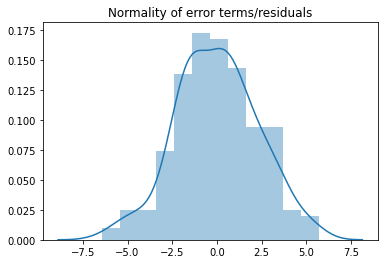

In [43]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

### Analysis of Normality of the residuals.
* The residuals follows the property of the normal distribution.
* Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.
* Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers.

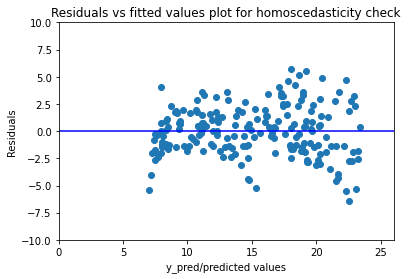

In [44]:
plt.scatter(predictions,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot([0,26],[0,0],color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

### Check for Homoscedasticity
* Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.
https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html

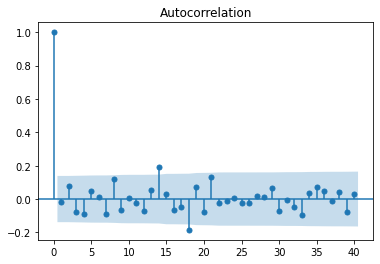

/Users/jaiprasad/test/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.025144734535132243

In [49]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

### Checking for autocorrelation 
* To ensure the absence of autocorrelation we use Ljungbox test.
 - https://www.statisticshowto.com/ljung-box-test/ 
 - The null hypothesis of the Box Ljung Test, H0, is that our model does not show lack of fit (or in simple terms—the model is just fine). The alternate hypothesis, Ha, is just that the model does show a lack of fit
* P value is small, we reject the null hypothesis that error terms are not autocorrelated

In [50]:
X = np.column_stack((data['TV'])).reshape(200,1)
y = data['Sales'].values.reshape(-1,1)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           7.93e-74
Time:                        16:08:55   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

* P value is less than 0.000, x1 coeficient is greater than standard error,hence we reject the null hypothesis
* R-squarred =0.812 so 81% of variability in Sales is explained by TV advertisement

In [3]:
def check_res(y_true,y_pred):
  fig, ax = plt.subplots()
  ax.scatter(y_true,y_pred)
  ax.set_title('ground truth to prediction graph')
  ax.set_ylim(0,30)
  ax.set_xlim(0,30)
  ax.plot(
    line,
    line,
    c='red',
    linewidth=2
  )
  plt.show()

  residuals=y_true-y_pred
  mean_res=np.mean(residuals)
  print("Mean of Residuals: {}".format(mean_res))

  plt.scatter(y_pred,residuals)
  plt.xlabel('y_pred/predicted values')
  plt.ylabel('Residuals')
  plt.ylim(-10,10)
  plt.xlim(0,26)
  sns.lineplot([0,26],[0,0],color='blue')
  plt.title('Residuals vs fitted values plot for homoscedasticity check')
  plt.show()
  
  sns.distplot(residuals,kde=True)
  plt.title('Normality of error terms/residuals')

  sm.graphics.tsa.plot_acf(residuals, lags=40)
  plt.show()

In [4]:
def simple_linear_regression(X,y_true,feature_name):
  '''
  Args:
    X-input
    y_true->ground truth
    feature_name -> name of the feature used
  Returns:
    None
  '''
  plt.plot(X)
  plt.show()

  plt.figure(figsize=(12, 8))

  plt.scatter(
      X,
      y_true,
      c='blue'
  )
  plt.xlabel("Money spent on "+feature_name+" ads ($)")
  plt.ylabel("Sales ($)")
  plt.show()

  reg = LinearRegression()
  reg.fit(X, y_true)
  print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


  predictions = reg.predict(X)
  plt.figure(figsize=(16, 8))
  plt.scatter(
      X,
      y_true,
      c='black'
  )
  plt.plot(
      X,
      predictions,
      c='blue',
      linewidth=2
  )
  plt.xlabel("Money spent on "+feature_name+" ads ($)")
  plt.ylabel("Sales ($)")
  plt.show()

  check_res(y_true,predictions)

  X = np.column_stack((data['Radio'])).reshape(200,1)
  y = data['Sales'].values.reshape(-1,1)
  X2 = sm.add_constant(X)
  est = sm.OLS(y, X2)
  est2 = est.fit()
  print(est2.summary())

## Regression Model using all the features

In [71]:
Xs = data.drop(['Sales'], axis=1)
print(Xs.head())
y = data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
pred = reg.predict(Xs)
print("Model loss: ", mean_squared_error(y,pred))
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
Model loss:  2.706006147627315
The linear model is: Y = 4.6251 + 0.054446*TV + 0.107*radio + 0.00033566*newspaper


## Analysis 
* If we spend 1000 dollors on TV advertisements then 54 more units will be sold
* If we spend 1000 dollors on Radio advertisements then 107 more units will be sold
* If we spend 1000 dollors on Newspaper advertisements then not even one extra item will be sold

When we have used Simple Linear Regression we found that for each 1000$ spent on Newspaper advertisements there will be increase in sales by 38 units. But when we considered all the features together to build a model we found out that Newspaper advertisements are not playing any role in increasing sales at all because there is a correlation between radio advertisements and newspaper advertisements. When advertisements are done to same customer using radio and newspaper they are actually buying the product because of radio advertisement and not because of newspaper ad.

Pearson correlation coefficient:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


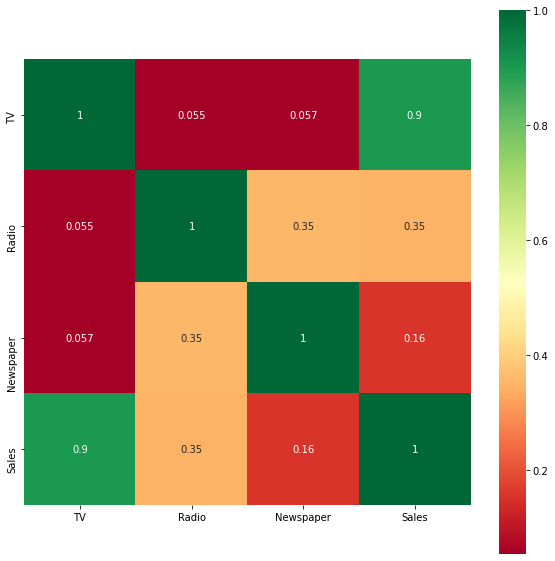

In [72]:
corrrelation= data.corr(method="pearson")
print("Pearson correlation coefficient:")
print(corrrelation);

plt.figure(figsize=(10,10))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True) 

## Pearson correlation coefficient.

* We need to have correlation b/w input feature and output
* We should select one input feature if multiple input features are highly correlated

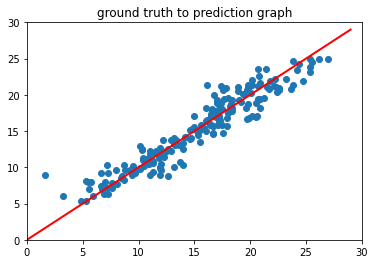

Mean of Residuals -2.660094367001875e-15


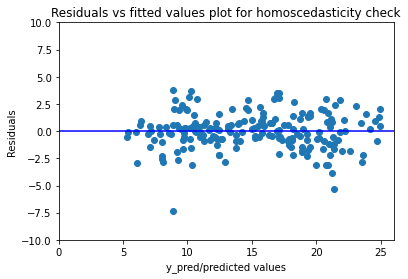

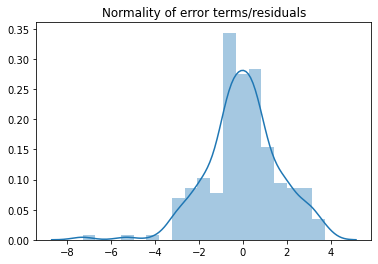

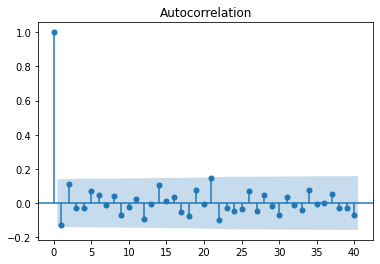

In [73]:
predictions = reg.predict(Xs)
check_res(data['Sales'].values.reshape(200,1),predictions)